In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model = cv2.dnn.readNetFromCaffe('models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')

In [3]:
image = cv2.imread("happy.jpg")
base_img = image.copy()
original_size = base_img.shape
target_size = (300, 300)
image = cv2.resize(image, target_size)
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])

In [4]:
blob = cv2.dnn.blobFromImage(image)
model.setInput(blob)
detections = model.forward()[0][0]

In [5]:
column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
detections_df = pd.DataFrame(detections, columns = column_labels)
detections_df

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.999828,0.221409,0.195037,0.753488,0.975585
1,0.0,1.0,0.997659,0.549188,0.552292,1.100170,1.308014
2,0.0,1.0,0.672148,2.226217,2.163162,2.752667,2.959434
3,0.0,1.0,0.609622,2.222932,3.013966,2.760145,3.809813
4,0.0,1.0,0.192830,2.176229,3.996497,2.810484,4.883318
...,...,...,...,...,...,...,...
195,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
196,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
197,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
198,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
detections.shape

(200, 7)

In [7]:
best_face = detections[0]
is_face = best_face[1]
confidence = best_face[2]
bb = (best_face[-4:]*300).astype(int)
print(bool(is_face))
confidence

True


0.999828

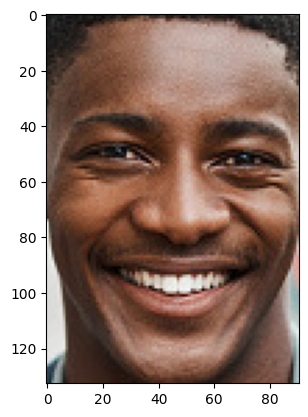

In [8]:
left, top, right, bottom = bb
detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y) ,
    int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
plt.imshow(detected_face[:, :, ::-1])